# Creating Randomized Bridge Hands

Bridge is a beloved game of my husband's family.

It was basically a requirement for me to learn when we started dating back in 2019. I remember sitting in his childhood home with his family, crowded around the dining table, trying for the life of me to remember what the "blackwood" convention meant and how to score when vulnerable. 

However, I eventually was successful in mastering the basics of Bridge, and was therefore allowed to officially join the family. 😉 Now, my husband and I enjoy visiting bridge clubs across Chicago, as well as playing a variety of games with our friends and family (Bridge, Hearts, Euchre, etc). I've discovered great joy in playing cards - I love strategy and am competitive at heart. Due to being so competitive, it's a bit of a sore spot when the cards aren't perfectly shuffled (which happens pretty often in a game where the full deck is shuffled every few minutes). Per a classic New York Times article, a hand needs to be shuffled 7 times to ensure completely randomness.

**NYT Article**: https://www.nytimes.com/1990/01/09/science/in-shuffling-cards-7-is-winning-number.html

To circumvent this, my husband and I turned to a Bridge hand generator to return "fairness" to the beloved game. 

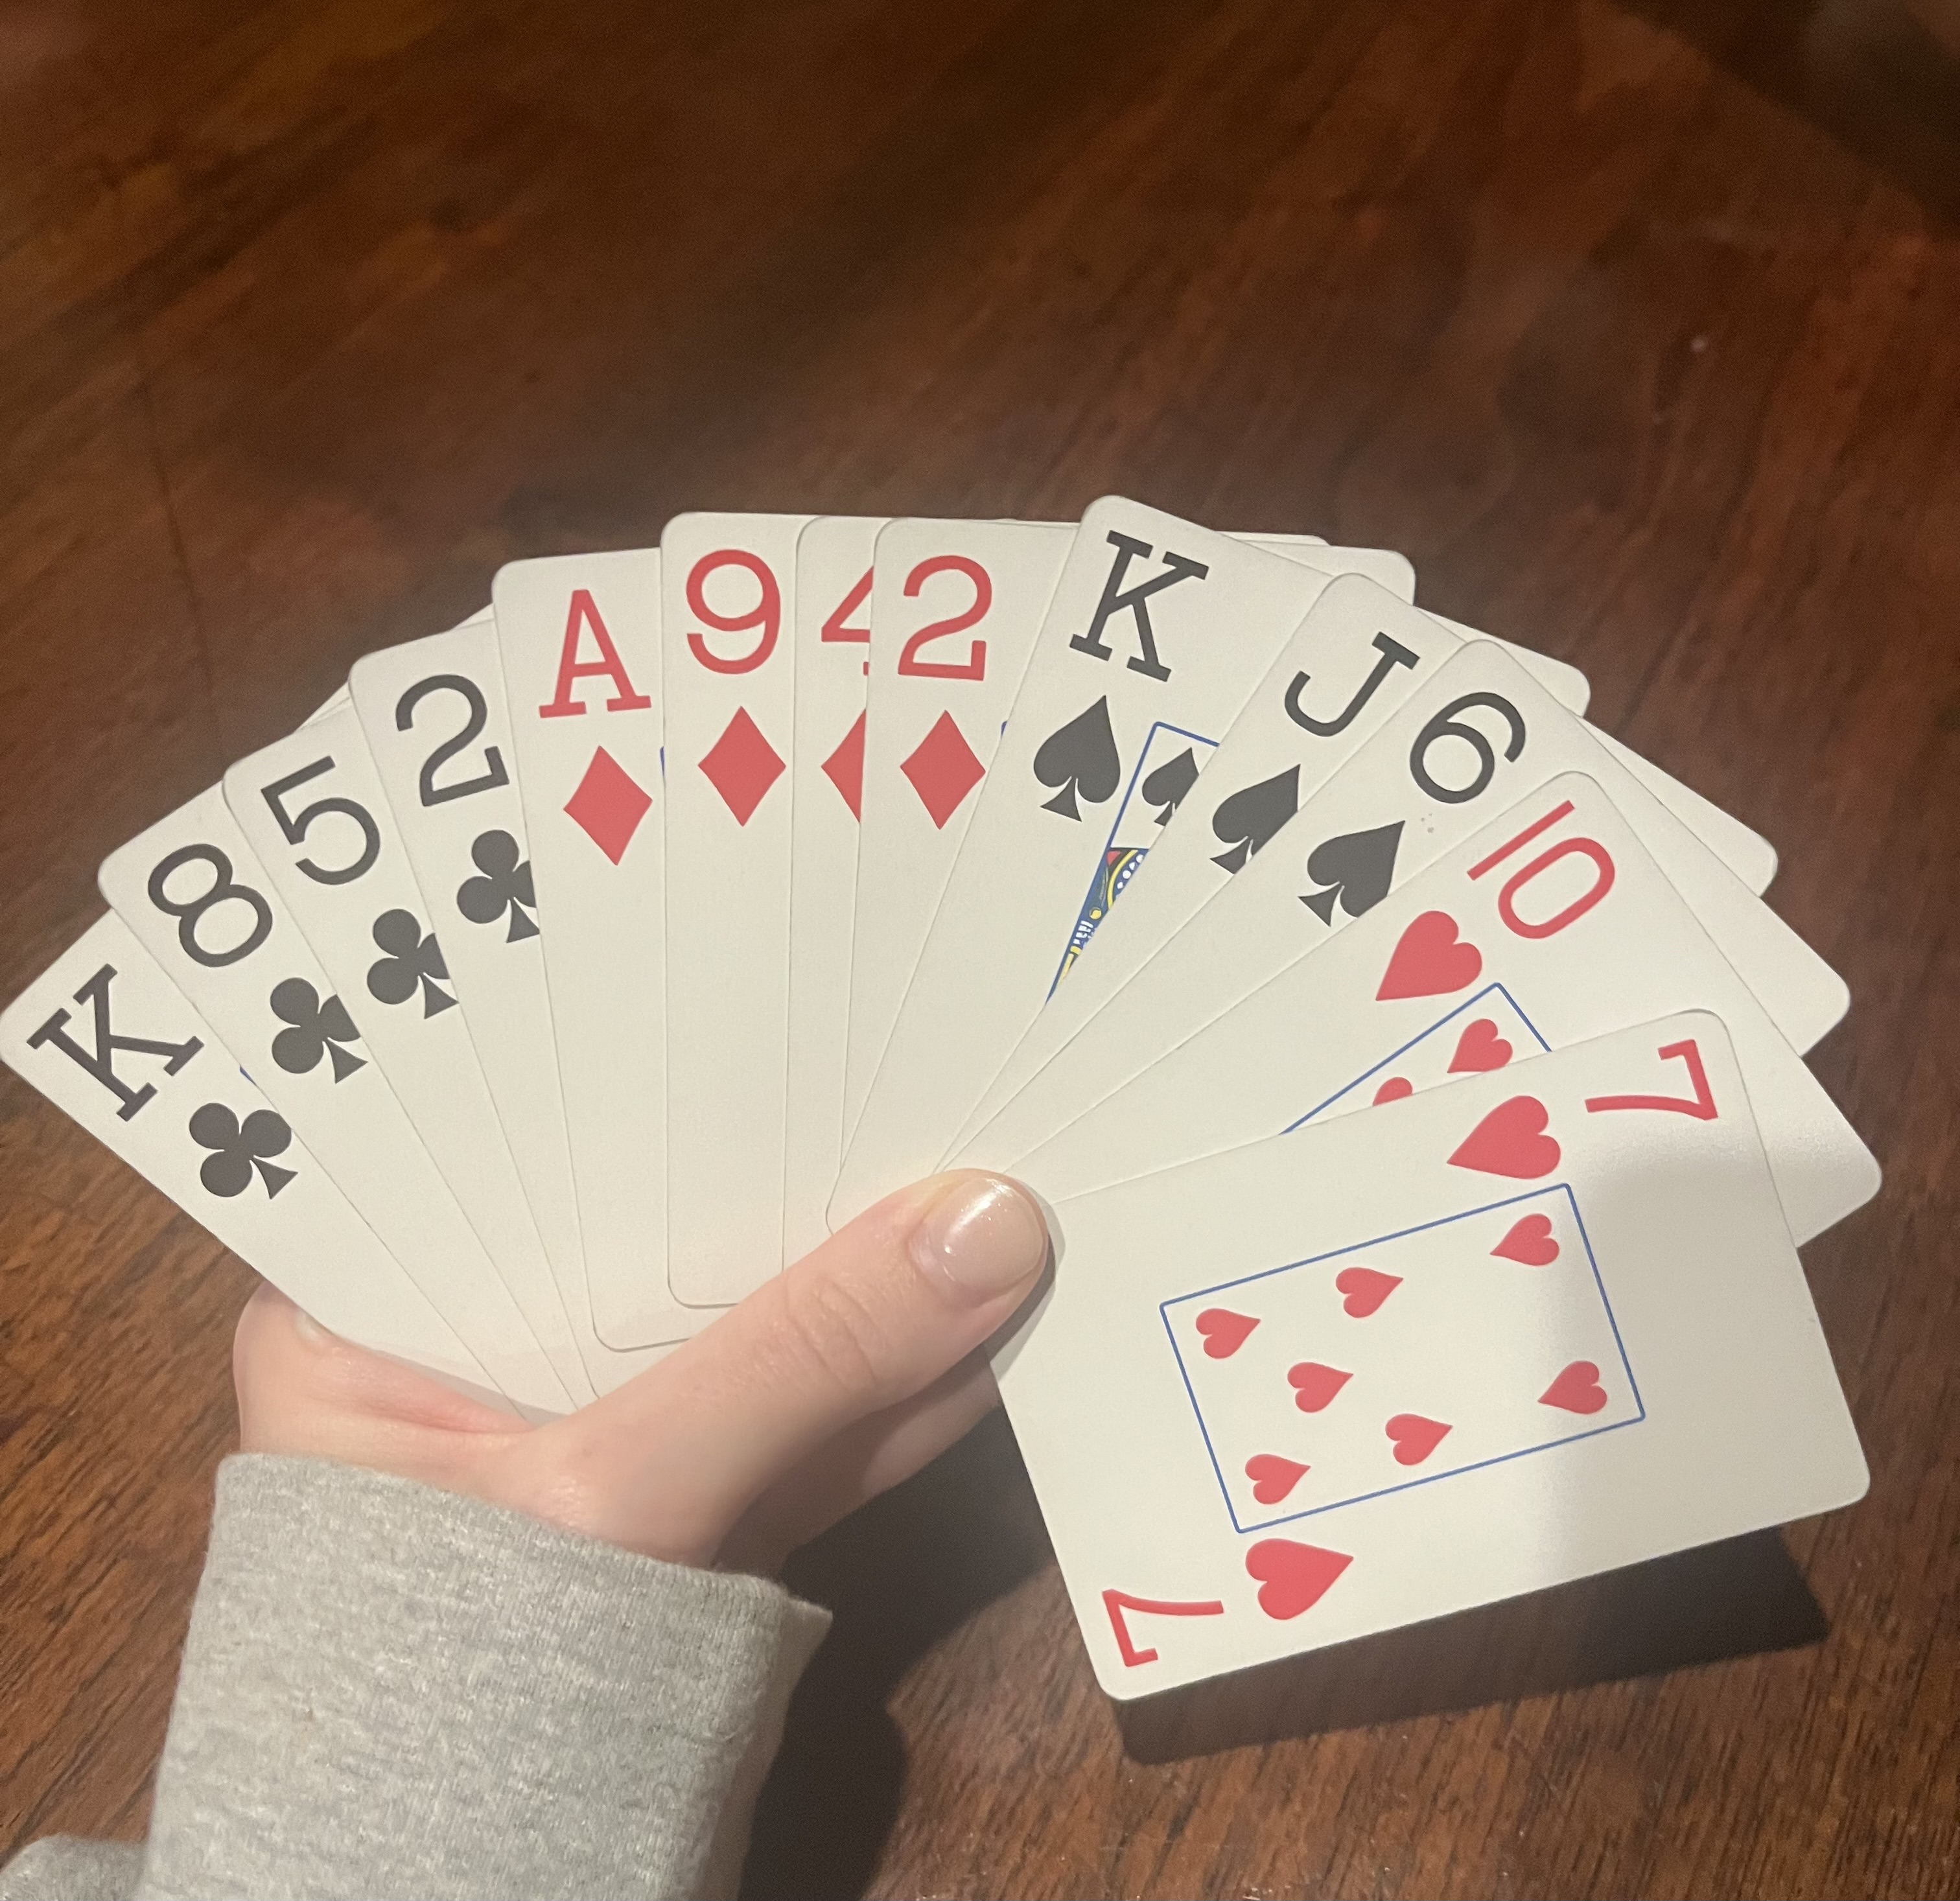

## Step 1. Download Bridge Hands

We used an automatic board generator to create 936 randomized board. Basically the computer generated them, they're completely *random*. No need to risk a bad shuffle. And so...the image comes in looking like this for each board. In our case, 936 automatically generated hands.

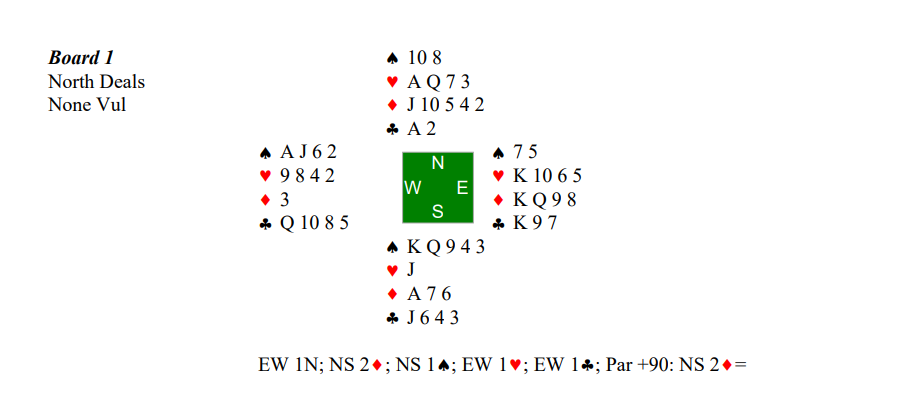

We want to create a database of these hands so we're not running through the same hands. To keep it scalable, we decided to use a Python script to create a matrix of the following: rows as the 13 cards dealt, including suit (S, H, D, C) and value (1-A), and columns as the player (North, East, South, West). This results in a 13 x 4 matrix per round of bridge. Matrix below - please pretend this is not done in Microsoft Paint lol.

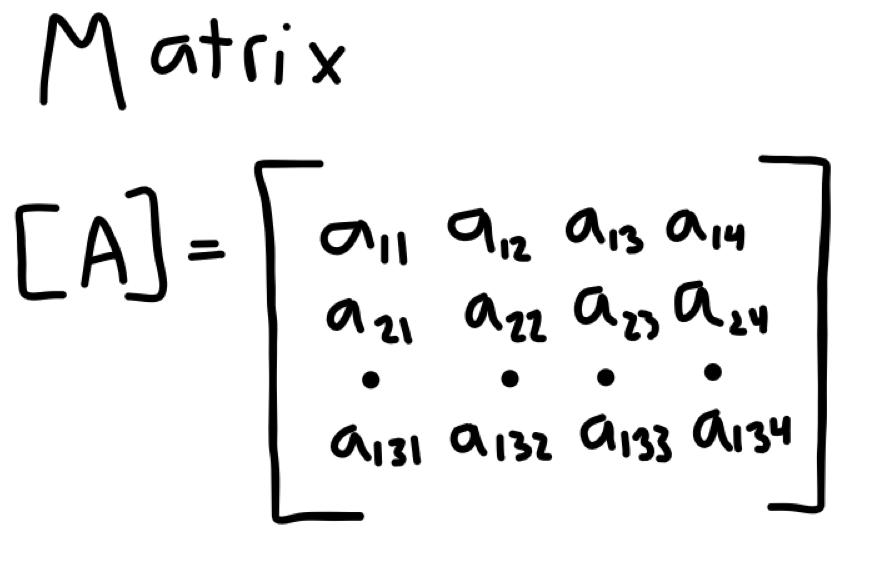

## Step 2. Parse the PDF

First, install the necessary libraries. We'll need PDFReader, repeat, and pandas (classic!)

In [2]:
# importing required modules 
from pypdf import PdfReader 
from itertools import repeat
import pandas as pd

Denote the file path of the PDF of dealt bridge rounds:

In [3]:
pdf_filepath = r'C:\Users\ellen\Desktop\BridgeHands\Bridge_Hands_1-936.pdf'

Now, let's create the parser object and see how many rounds to parse.

In [7]:
reader = PdfReader(pdf_filepath) 
  
# printing number of pages in pdf file 
print(len(reader.pages), "pages! Woohoo! Let's play some bridge.") 

936 pages! Woohoo! Let's play some bridge.


We'll read the first page. Looks pretty crazy as a reader object right now.

In [9]:
 # getting a specific page from the pdf file 
page = reader.pages[1] 

page

{'/Type': '/Page',
 '/Parent': {'/Type': '/Pages',
  '/Kids': [IndirectObject(8, 0, 2550860145376),
   IndirectObject(22, 0, 2550860145376),
   IndirectObject(24, 0, 2550860145376),
   IndirectObject(26, 0, 2550860145376),
   IndirectObject(32, 0, 2550860145376),
   IndirectObject(34, 0, 2550860145376),
   IndirectObject(36, 0, 2550860145376),
   IndirectObject(38, 0, 2550860145376),
   IndirectObject(40, 0, 2550860145376),
   IndirectObject(42, 0, 2550860145376),
   IndirectObject(44, 0, 2550860145376),
   IndirectObject(46, 0, 2550860145376),
   IndirectObject(48, 0, 2550860145376),
   IndirectObject(50, 0, 2550860145376),
   IndirectObject(52, 0, 2550860145376),
   IndirectObject(54, 0, 2550860145376),
   IndirectObject(56, 0, 2550860145376),
   IndirectObject(58, 0, 2550860145376),
   IndirectObject(60, 0, 2550860145376),
   IndirectObject(62, 0, 2550860145376),
   IndirectObject(64, 0, 2550860145376),
   IndirectObject(66, 0, 2550860145376),
   IndirectObject(68, 0, 2550860145376)

Create the dataframe that will store each "round" matrix. In terms of information to parse, we want:
- Board Name
- Who Dealt
- Who is Vulnerable
- North's Hand
- East's Hand
- South's Hand
- West's Hand

In [10]:
master_table = pd.DataFrame(columns=['Board_Name','Deal','Vulnerable',
                                     'North_Player','West_Player','East_Player','South_Player'])

Now...to parse the pages!

In [12]:
for i in range(0,len(reader.pages)):
    page = reader.pages[i] 
    text = page.extract_text() 
    
    board = text.split("\n")[0].replace(" ", "_")
    deal = text.split("\n")[1]
    vulnerable = text.split("\n")[2].split("♠")[0]
    
    
    north_spades = ["S" + item for item in text.split("\n")[2].split("Vul♠")[1].split(" ")]
    north_hearts = ["H" + item for item in text.split("\n")[3].replace("♥", "").split(" ")]
    north_diamonds = ["D" + item for item in text.split("\n")[4].replace("♦", "").split(" ")]
    north_clubs = ["C" + item for item in text.split("\n")[5].replace("♣", "").split(" ")]
    
    west_spades = ["S" + item for item in text.split("\n")[6].replace("♠", "").split(" ")]
    west_hearts = ["H" + item for item in text.split("\n")[7].replace("♥", "").split(" ")]
    west_diamonds = ["D" + item for item in text.split("\n")[8].replace("♦", "").split(" ")]
    west_clubs = ["C" + item for item in text.split("\n")[9].replace("♣", "").split("♠")[0].split(" ")]
    
    east_spades = ["S" + item for item in text.split("\n")[9].split("♠")[1].split(" ")]
    east_hearts = ["H" + item for item in text.split("\n")[10].replace("♥", "").split(" ")]
    east_diamonds = ["D" + item for item in text.split("\n")[11].replace("♦", "").split(" ")]
    east_clubs = ["C" + item for item in text.split("\n")[12].replace("♣", "").split(" ")]
    
    south_spades = ["S" + item for item in text.split("\n")[13].replace("♠", "").split(" ")]
    south_hearts = ["H" + item for item in text.split("\n")[14].replace("♥", "").split(" ")]
    south_diamonds = ["D" + item for item in text.split("\n")[15].replace("♦", "").split(" ")]
    south_clubs = ["C" + item for item in text.split("\n")[16].replace("N", "").replace("♣", "").split("♠")[0].split(" ")]
    
    north = north_spades + north_hearts + north_diamonds + north_clubs
    west = west_spades + west_hearts + west_diamonds + west_clubs
    east = east_spades + east_hearts + east_diamonds + east_clubs
    south = south_spades + south_hearts + south_diamonds + south_clubs
    
    north = [item for item in north if "—" not in item]
    west = [item for item in west if "—" not in item]
    east = [item for item in east if "—" not in item]
    south = [item for item in south if "—" not in item]
    
    board_dict =  {'Board_Name': list(repeat(board, 13)),
                   'Deal': list(repeat(deal, 13)),
                   'Vulnerable': list(repeat(vulnerable, 13)), 
                   'North_Player': north,
                   'West_Player':south,
                   "East_Player": east,
                   "South_Player": south}
    
    board_df = pd.DataFrame(board_dict)
    
    master_table = pd.concat([master_table, board_df], ignore_index=True, axis=0)

## Step 3. Return to CSV

WOO! Let's look at the first round of bridge parsed created. See how it matches the image above???

In [14]:
master_table.head(13)

,Board_Name,Deal,Vulnerable,North_Player,West_Player,East_Player,South_Player
0,Board_1,North Deals,None Vul,S10,SK,S7,SK
1,Board_1,North Deals,None Vul,S8,SQ,S5,SQ
2,Board_1,North Deals,None Vul,HA,S9,HK,S9
3,Board_1,North Deals,None Vul,HQ,S4,H10,S4
4,Board_1,North Deals,None Vul,H7,S3,H6,S3
5,Board_1,North Deals,None Vul,H3,HJ,H5,HJ
6,Board_1,North Deals,None Vul,DJ,DA,DK,DA
7,Board_1,North Deals,None Vul,D10,D7,DQ,D7
8,Board_1,North Deals,None Vul,D5,D6,D9,D6
9,Board_1,North Deals,None Vul,D4,CJ,D8,CJ


The goal with this is to be able to create a database of all hands created from the bridge generator. At this scale, we're not using something of the scope of SQL, but just saving the Pandas dataframe as a CSV.

In [16]:
master_table.to_csv(r'C:\Users\ellen\Desktop\BridgeHands\finalized_result.csv')

Happy bridge playing!